In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io
import numpy as np
import glob

In [4]:
files = (glob.glob('Coll*/data/*/*/*/Pr*ta/*rec.tif'))

In [5]:
Xs = []
for file in files:
    im = io.imread(file)
    Xs.append(im)

In [7]:
Xs[0].shape

(461, 497, 461)

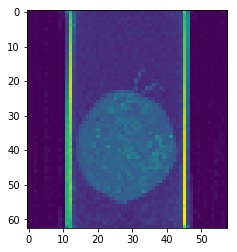

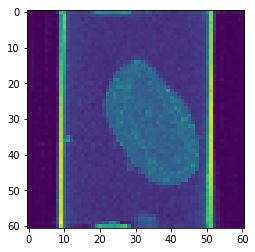

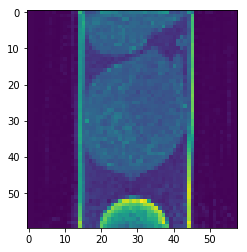

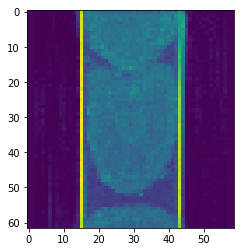

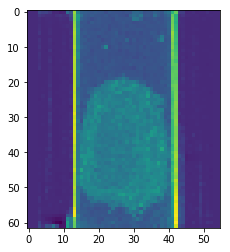

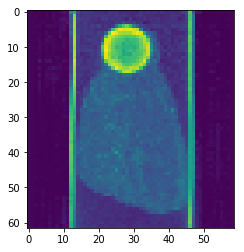

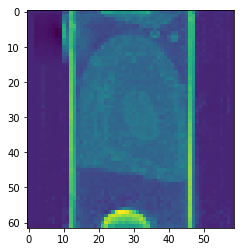

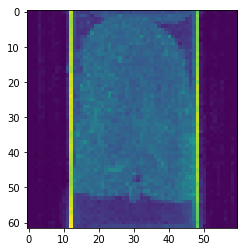

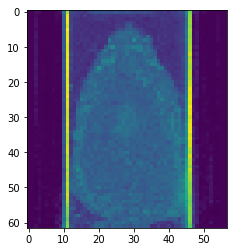

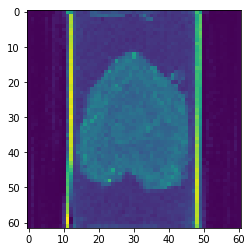

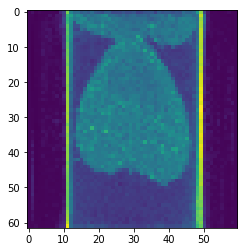

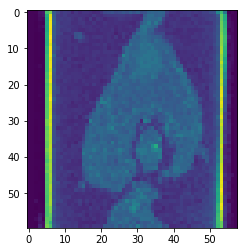

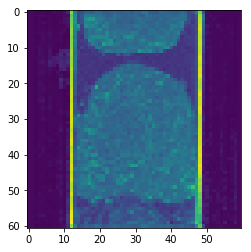

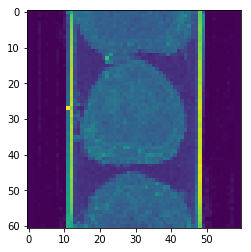

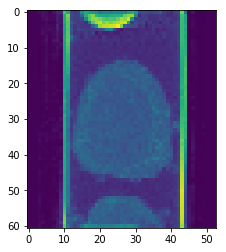

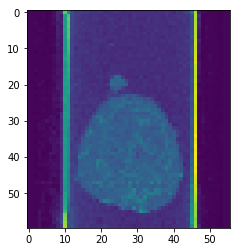

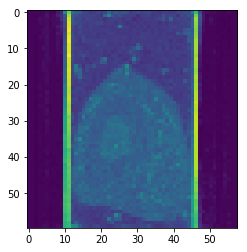

In [8]:
# 150 - 300
for i in range(len(Xs)):
    plt.imshow(Xs[i][300][::8,::8])
    plt.show()

In [34]:
X = []
for x in Xs:
    im = x[150:300,::8,::7]
    _,xx,yy = im.shape
    fix_x = xx-60
    fix_y = yy-60
    if (fix_x%2==1):
        im = im[:,fix_x//2:-(fix_x//2+1)]
    elif (fix_x>0):
        im = im[:,fix_x//2:-(fix_x//2)]
    if (fix_y%2==1):
        im = im[:,:,fix_y//2:-(fix_y//2+1)]
    elif (fix_y>0):
        im = im[:,:,fix_y//2:-(fix_y//2)]
    X.append(im)

In [35]:
X = np.concatenate((X))

In [36]:
X = X - X.min()
X = X/X.max()
# to homogenize the data a bit
X = np.sqrt(X)

In [37]:
X_train = np.zeros((len(X),3600))

for i in range(len(X)):
    X_train[i] = X[i].flatten()

In [38]:
X_train.shape

(2550, 3600)

In [39]:
from keras.models import Sequential
from keras.layers import Input, Dense, Convolution2D, Flatten, MaxPooling2D, Conv2DTranspose, UpSampling2D

In [40]:
model = Sequential()

In [90]:
model = Sequential()
model.add(Dense(1024, input_dim=3600, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(3600, activation='sigmoid'))

model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [91]:
model.fit(X_train,X_train,batch_size=10,epochs=10)

Epoch 1/10
2550/2550 [==============================] - 34s 13ms/step - loss: 0.6601 - acc: 1.0893e-07
Epoch 2/10
2550/2550 [==============================] - 34s 13ms/step - loss: 0.6555 - acc: 1.0893e-07
Epoch 3/10
2550/2550 [==============================] - 34s 13ms/step - loss: 0.6544 - acc: 1.0893e-07
Epoch 4/10
2550/2550 [==============================] - 34s 13ms/step - loss: 0.6539 - acc: 2.1786e-07
Epoch 5/10
2550/2550 [==============================] - 33s 13ms/step - loss: 0.6536 - acc: 2.1786e-07
Epoch 6/10
2550/2550 [==============================] - 33s 13ms/step - loss: 0.6535 - acc: 2.1786e-07
Epoch 7/10
2550/2550 [==============================] - 32s 13ms/step - loss: 0.6532 - acc: 2.1786e-07
Epoch 8/10
2550/2550 [==============================] - 31s 12ms/step - loss: 0.6532 - acc: 2.1786e-07
Epoch 9/10
2550/2550 [==============================] - 31s 12ms/step - loss: 0.6531 - acc: 2.1786e-07
Epoch 10/10
2550/2550 [==============================] - 31s 12ms/step - 

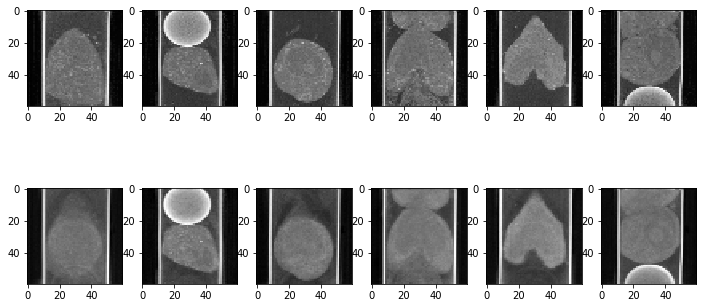

In [92]:
fig,ax = plt.subplots(ncols=6,nrows=2,figsize=(12,6))

for i in range(6):
    idx = np.random.randint(len(X_train))
    ax[0,i].imshow(X_train[idx].reshape(60,60),cmap='gray')
    ae = model.predict(X_train[idx:idx+1])
    ax[1,i].imshow(ae.reshape(60,60),cmap='gray')
plt.show()

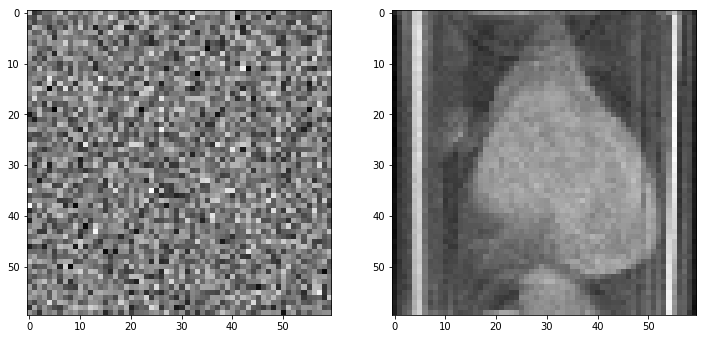

In [109]:
fig,ax = plt.subplots(ncols=2,figsize=(12,6))

feed = np.random.normal(X_train.mean(), X_train.std(),size=(60,60))
out = model.predict(feed.flatten().reshape(1,-1))

ax[0].imshow(feed,cmap='gray')
ax[1].imshow(out.reshape(60,60),cmap='gray')
plt.show()